In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
22,161 cases (7 day average) as of Sun 04 Jul, +938.9 since Sat 03 Jul
379 hospitalised (7 day average) as of Wed 07 Jul, +18.6 since Tue 06 Jul
18 died (7 day average) as of Sun 04 Jul, +1.3 since Sat 03 Jul


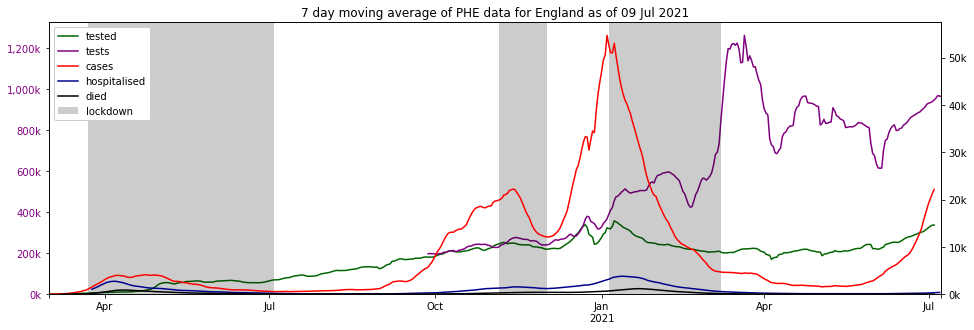

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

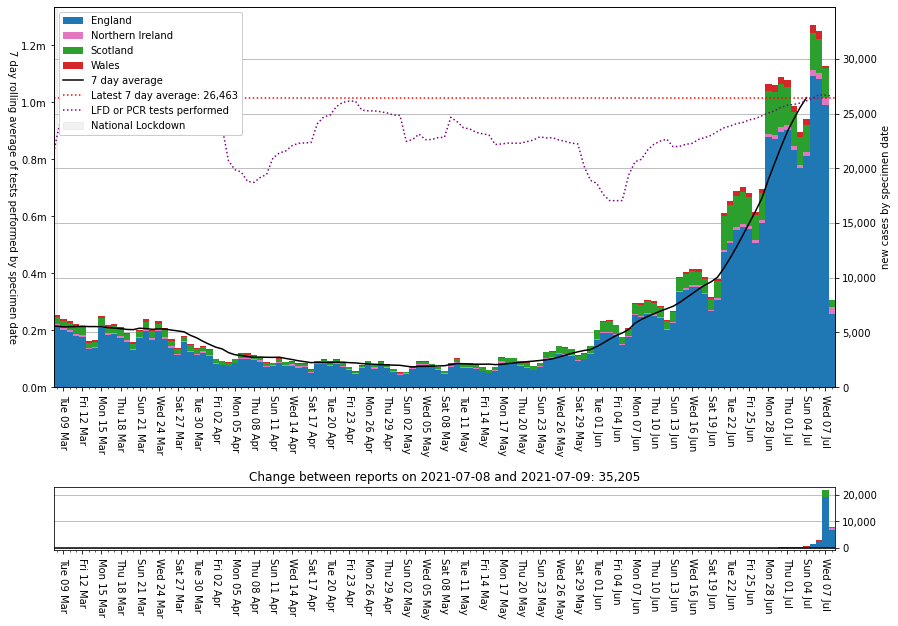

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

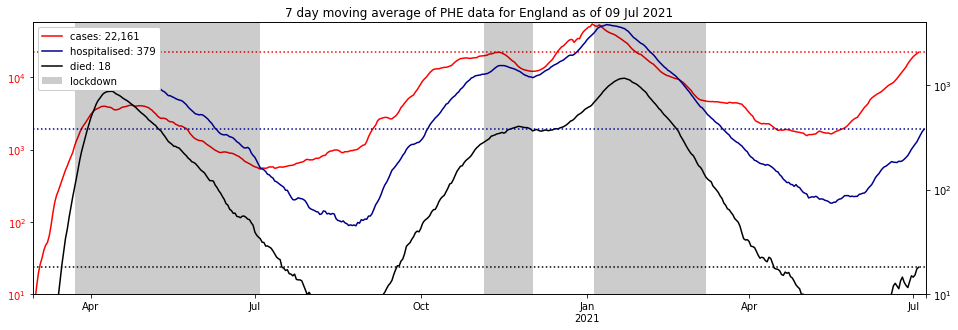

In [5]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,),
             right_series=(s.new_admissions_sum, s.new_deaths_sum))

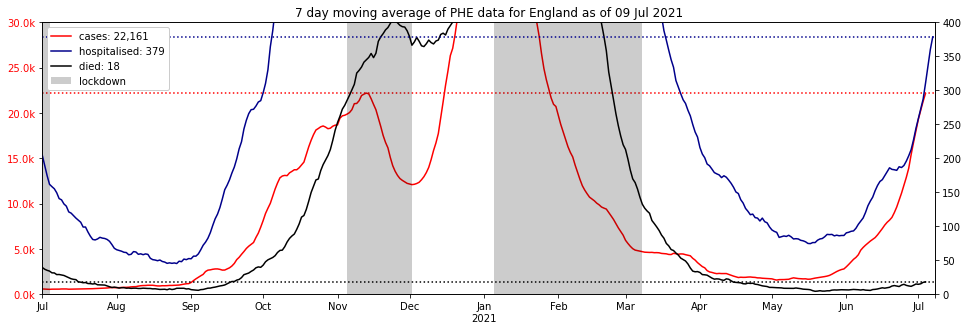

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=30_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=400)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,08 Jul 21,"+28,805,193","+38,335,161","+28,805,193","+135,457","+82,807","+135,457"
Northern Ireland,08 Jul 21,"+926,855","+1,181,008","+926,855","+6,777","+1,912","+6,777"
Scotland,08 Jul 21,"+2,843,938","+3,911,189","+2,843,938","+18,052","+10,325","+18,052"
Wales,08 Jul 21,"+1,798,260","+2,270,517","+1,798,260","+15,181","+1,386","+15,181"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,28805193.0,38335161.0,9529968.0,56286961,51.175605,16.931040,31.893354
1,Northern Ireland,N92000002,926855.0,1181008.0,254153.0,1893667,48.944983,13.421209,37.633808
2,Scotland,S92000003,2843938.0,3911189.0,1067251.0,5463300,52.055315,19.534915,28.409771
3,Wales,W92000004,1798260.0,2270517.0,472257.0,3152879,57.035490,14.978596,27.985914


'partial: 45,697,875 (68.4%), full: 34,374,246'

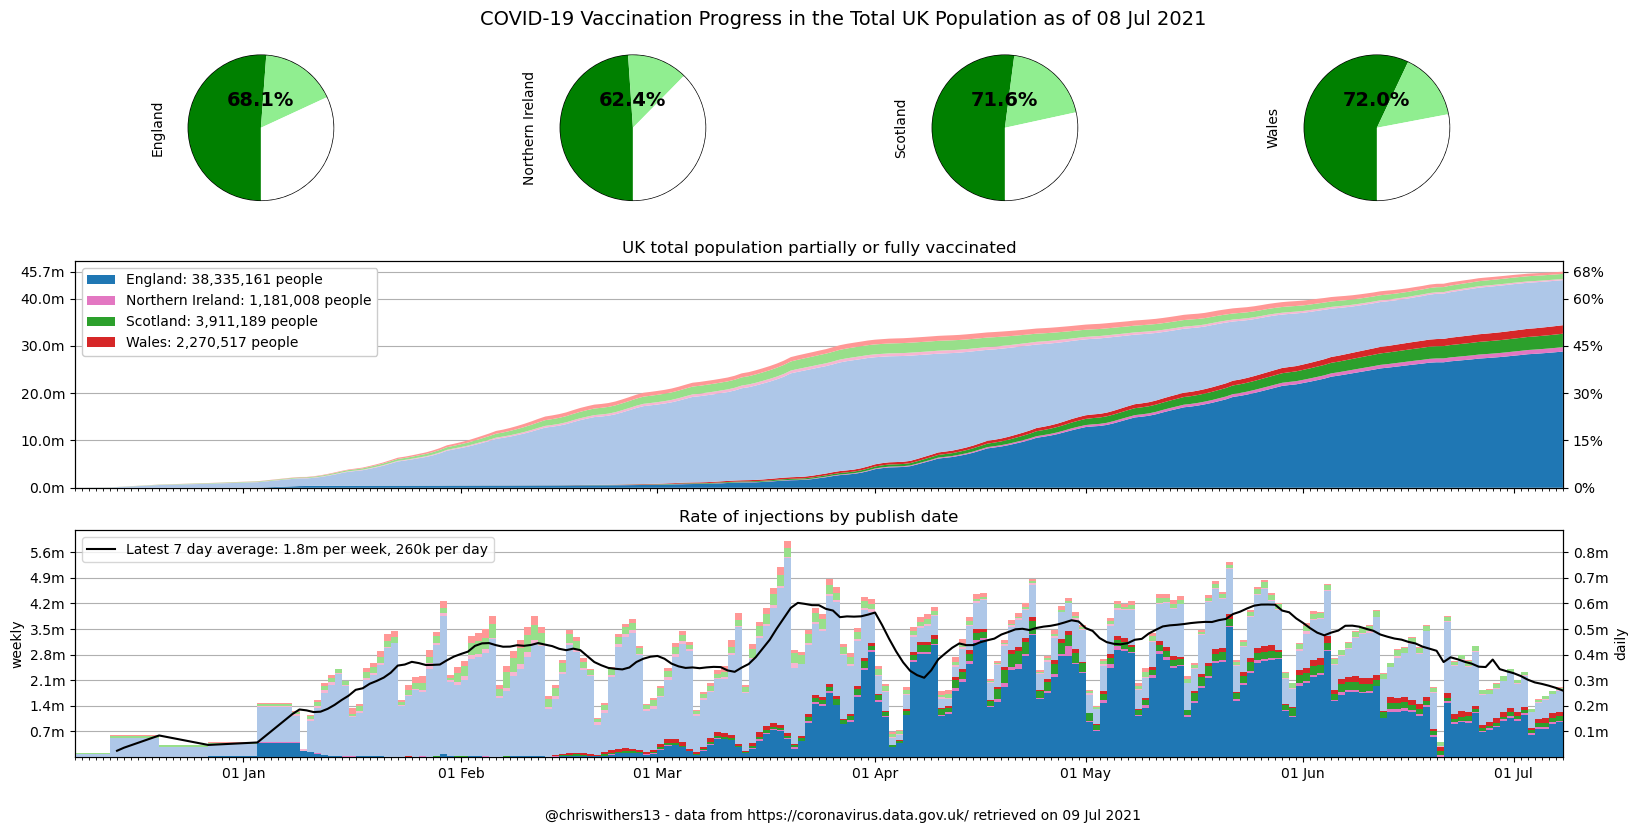

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

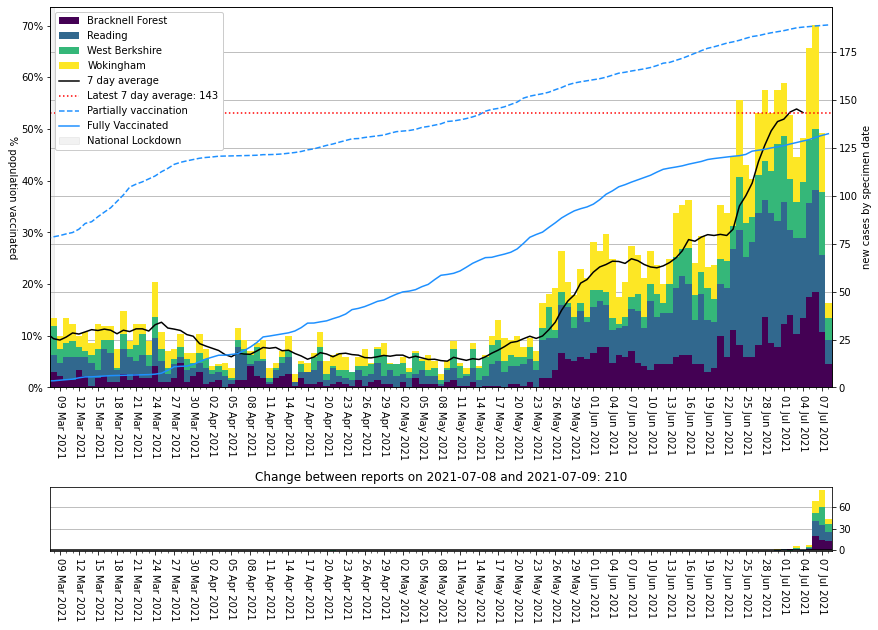

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=population_vaccinated)

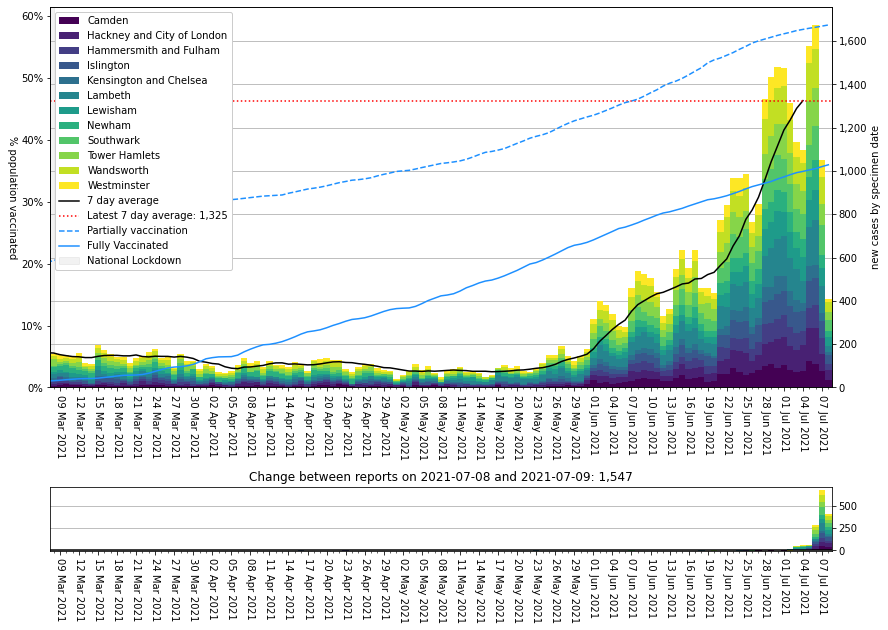

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000023,South Tyneside,1160.449343,1752.0,2021-07-08
E08000024,Sunderland,772.402369,2145.0,2021-07-08
E06000012,North East Lincolnshire,770.855399,1230.0,2021-07-08
E08000037,Gateshead,760.683972,1537.0,2021-07-08
E06000001,Hartlepool,720.668781,675.0,2021-07-08
E08000021,Newcastle upon Tyne,717.588006,2173.0,2021-07-08
E06000002,Middlesbrough,643.353667,907.0,2021-07-08
S12000042,Dundee City,640.235735,956.0,2021-07-08
S12000019,Midlothian,629.461389,582.0,2021-07-08


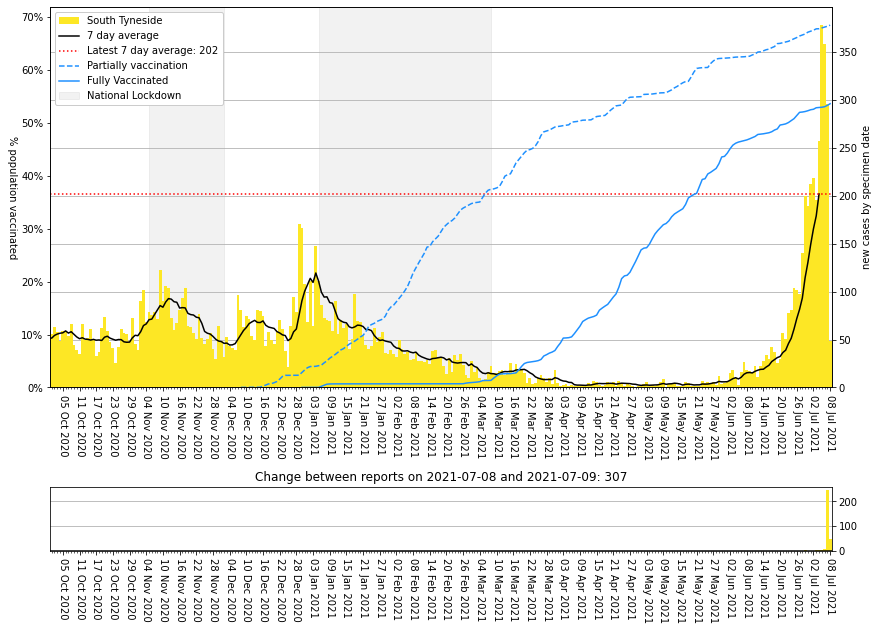

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,452.253640,3587.0,2021-07-08
E08000025,Birmingham,303.989434,3471.0,2021-07-08
E06000047,County Durham,629.322347,3336.0,2021-07-08
S12000049,Glasgow City,383.339651,2427.0,2021-07-08
S12000036,City of Edinburgh,437.201151,2295.0,2021-07-08
E08000003,Manchester,414.934757,2294.0,2021-07-08
E08000021,Newcastle upon Tyne,717.588006,2173.0,2021-07-08
E08000024,Sunderland,772.402369,2145.0,2021-07-08
E08000012,Liverpool,424.060621,2112.0,2021-07-08


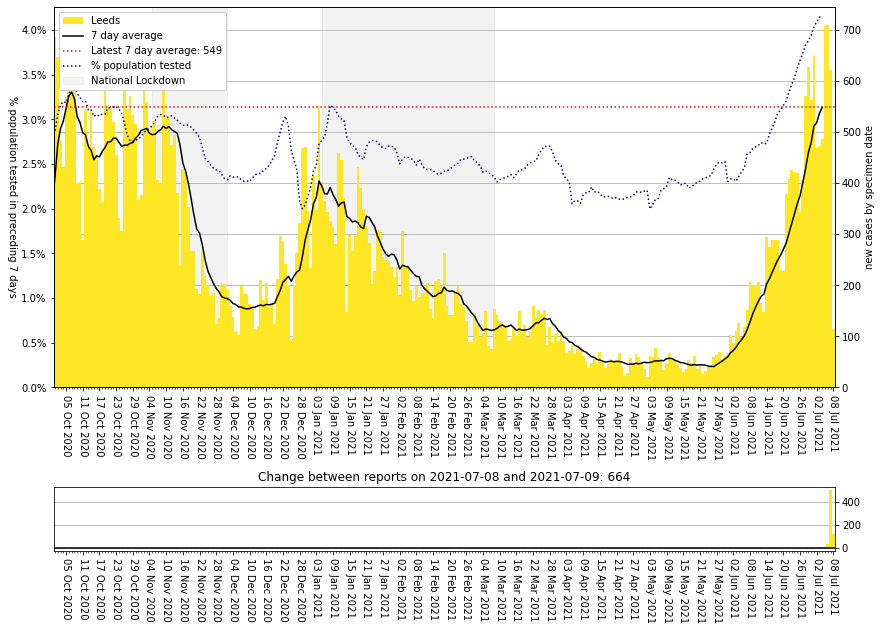

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 2.5
phe_max = 0.8

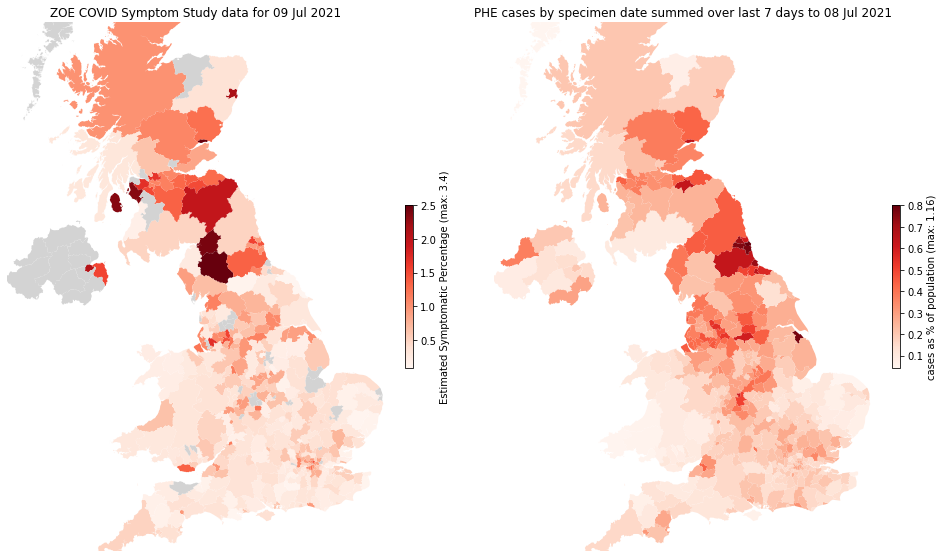

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...